In [127]:
lines = open('inputs/day22.txt').readlines()
lines = [line[:-1] for line in lines]
*maze, _, path = lines
path += "F" # Add the extra command "Forwards" instructions

part1 = False
max_x = max([len(line) for line in maze])
max_y = len(maze)
maze = [line + ' '*(max_x-len(line)) for line in maze]

def yield_instructions(path): 
    """
    (number, direction (L/R/F))
    """
    while len(path) > 0: 
        ind = 0
        while path[ind] not in "LRF": 
            ind += 1
        
        yield int(path[:ind]), path[ind]
        path = path[ind+1:]
    

# Start on the first space on the top-left and face to the right
startpos = (0, maze[0].find('.')) # Y, X
start_facing = '>'

directions = ">v<^" # right, down, left, up. in Clockwise order
deltas = {
    '>': (0, 1), # right, Y, X
    '^': (-1, 0), 
    "v": (1, 0), 
    '<': (0, -1),
}

def draw_maze(maze, history): 
    """
        Helper function to simply print the maze in our terminal
    """
    for y in range(len(maze)): 
        for x in range(len(maze[0])): 
            if (y,x) in history: 
                print('x', end='')
            else: 
                print(maze[y][x], end='')
        print('')

pos = startpos
facing = start_facing

# Keep track of our positions for debugging
positions_history = set([pos])

def add_teleport_line(teleport_places, startsource, startgoal, source_delta, goal_delta, source_direction, goal_direction, len_side = 50):
    """
        Add a range of teleportation sources and goals to the teleport_places dictionary
        Start source and startgoal are inclusive
    """
    for _ in range(len_side):
        teleport_places[(startsource[0], startsource[1], source_direction)] = (startgoal[0], startgoal[1], goal_direction)
        startsource = (startsource[0] + source_delta[0], startsource[1] + source_delta[1])
        startgoal = (startgoal[0] + goal_delta[0], startgoal[1] + goal_delta[1])

# Add all vertices to the portals
teleport_places = dict()

add_teleport_line(teleport_places, (50,100), (49, 100), (1,0), (0,1), '>', '^') # AR -> AD
add_teleport_line(teleport_places, (50,100), (50, 99), (0,1), (1,0), 'v', '<') # AD -> AR

add_teleport_line(teleport_places, (50, 49), (100, 0), (1, 0), (0, 1), '<', 'v') # BL -> BU
add_teleport_line(teleport_places, (99, 0), (50,50), (0, 1), (1, 0), '^', '>') # BU -> BL

add_teleport_line(teleport_places, (0, 0), (149, 99), (1, 0), (-1, 0), '>', '<') # CR -> CL
add_teleport_line(teleport_places, (100, 100), (49,149), (1, 0), (-1, 0), '>', '<') # CL -> CR

add_teleport_line(teleport_places, (150, 50), (149, 50), (1, 0), (0, 1), '>', '^') # DR -> DD
add_teleport_line(teleport_places, (150, 50), (150, 49), (0, 1), (1, 0), 'v', '<') # DD -> DR

add_teleport_line(teleport_places, (100, 149), (49, 50), (1, 0), (-1, 0), "<", ">") # EL -> ER
add_teleport_line(teleport_places, (0, 49), (149, 0), (1, 0), (-1, 0), "<", ">") # ER -> EL

add_teleport_line(teleport_places, (150, 149), (0, 50), (1, 0), (0, 1), "<", "v") # FL -> FD
add_teleport_line(teleport_places, (199, 50), (150, 0), (0, 1), (1, 0), "^", ">") # FD -> FL

add_teleport_line(teleport_places, (0, 0), (0, 100), (0, 1), (0, 1), "v", "v") # GD -> GDD
add_teleport_line(teleport_places, (199, 100), (199, 0), (0, 1), (0, 1), "^", "^") # GDD -> GD

for count_steps, turn in yield_instructions(path): 
    assert count_steps > 0
    assert turn in "LRF"
  
    # Move forwards count_steps
    for _ in range(count_steps): 
        # wrap around the maze
        nextplace = (pos[0] + deltas[facing][0], pos[1] + deltas[facing][1]) # Y, X
        nextplace = (nextplace[0] % max_y, nextplace[1] % max_x)
        nextfacing = facing

        if part1: 
            # For part 1, simply go to the first possible place which is free
            while maze[nextplace[0]][nextplace[1]] not in "#.": 
                # Keep moving until we are on solid ground again!
                nextplace = (nextplace[0] + deltas[facing][0], nextplace[1] + deltas[facing][1])
                nextplace = (nextplace[0] % max_y, nextplace[1] % max_x)

        else: 
            # For part 2 we actually use a portal to go to another face of the cube
            if maze[nextplace[0]][nextplace[1]] not in "#.": 
                # Teleport!
                if (nextplace[0], nextplace[1], facing) in teleport_places: 
                    nexty, nextx, nextfacing = teleport_places[(nextplace[0], nextplace[1], facing)]
                    nextplace = (nexty, nextx)
                else: 
                    raise Exception("Teleport not implemented")
            

        if maze[nextplace[0]][nextplace[1]] == "#":
            # If we hit a wall, no need to try again and no need to move
            break
        elif maze[nextplace[0]][nextplace[1]] == ".":
            # We can move
            pos = nextplace
            facing = nextfacing
            positions_history.add(pos)
        else:
            raise Exception("Unknown character in maze: ", nextplace, maze[nextplace[0]][nextplace[1]])
    
    # Turn
    old_facing = facing
    if turn == "L": 
        facing = directions[(directions.find(facing) - 1)%len(directions)]
    elif turn == "R": 
        facing = directions[(directions.find(facing) + 1)%len(directions)]
    else:
        pass

print("Solution", (pos[0]+1) * 1000 + (pos[1]+1)*4 + directions.index(facing))       

Solution 156166


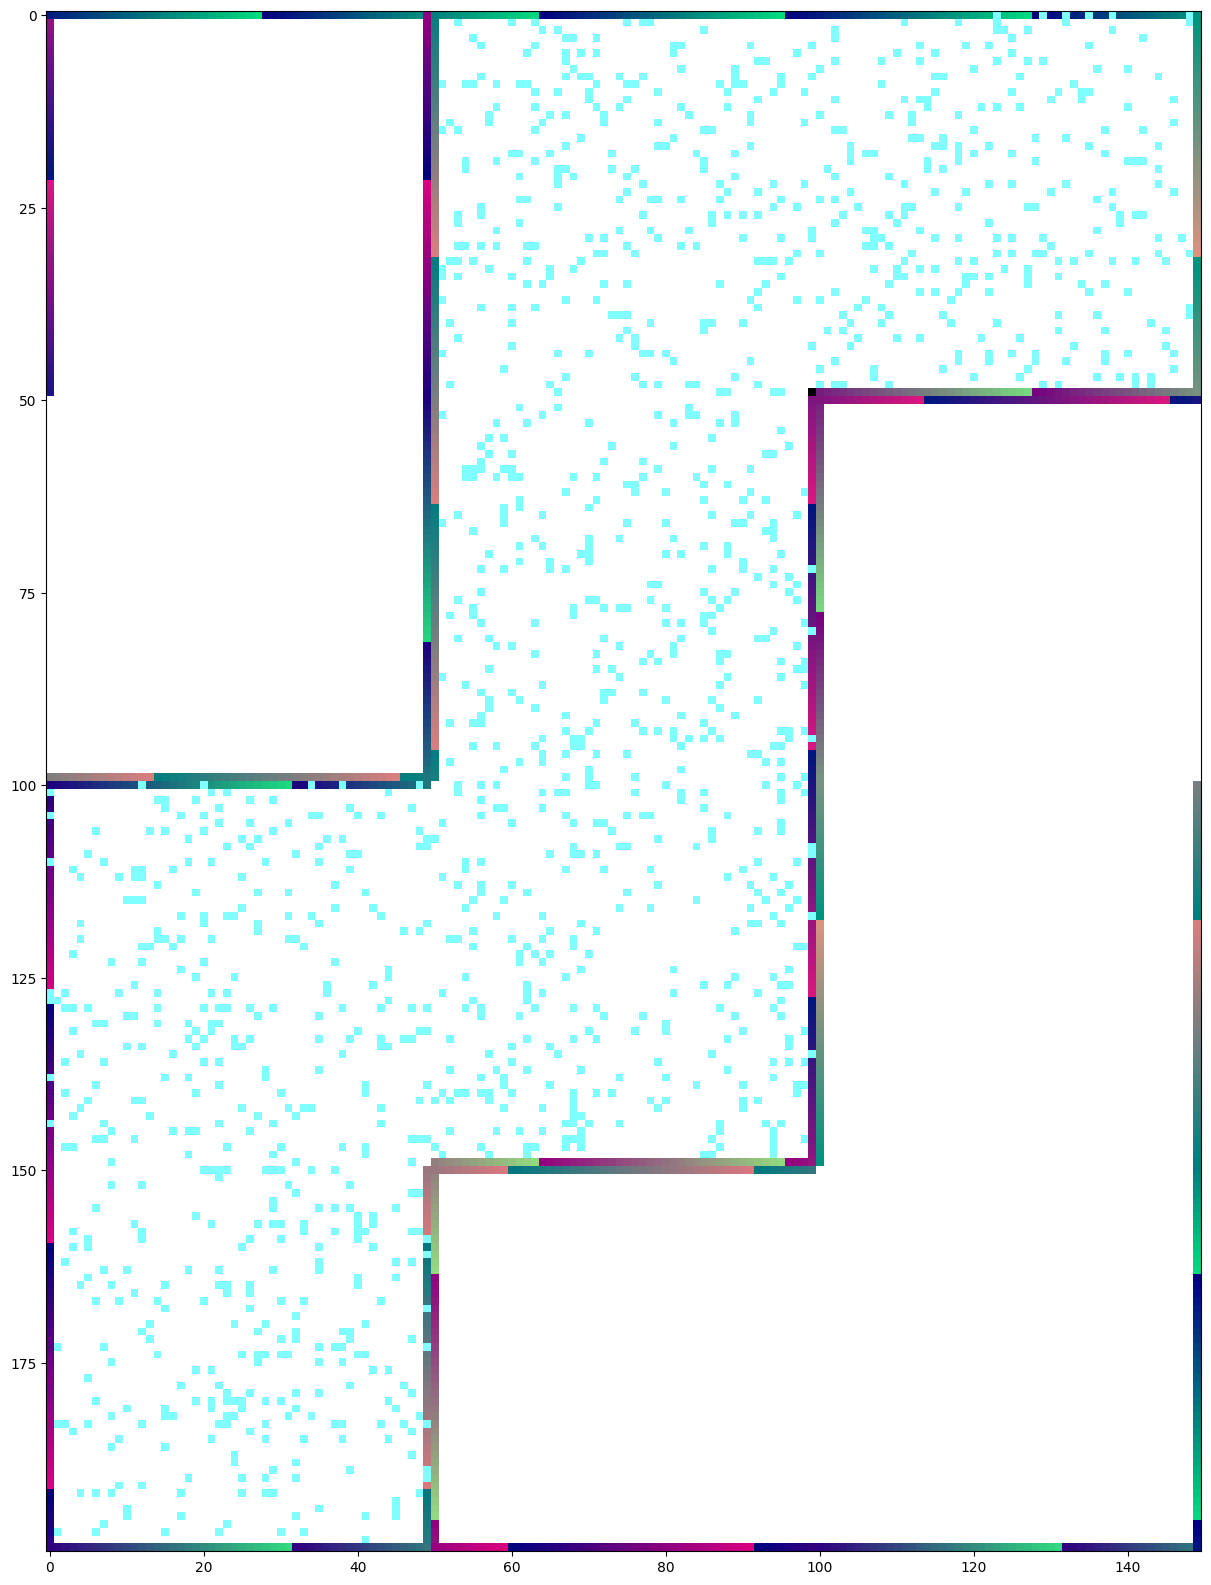

In [126]:
import numpy as np
import matplotlib.pyplot as plt
newimage = np.ones((max_y, max_x, 3), dtype= np.float32)
for y, line in enumerate(maze): 
    for x, char in enumerate(line): 
        # Draw the native maze colour
        if char in ".":
            pass
            #newimage[y, x] = #(1.0, 1.0, 0.5)
        elif char in "#": 
            newimage[y, x] = (0.5, 1.0, 1.0)

        # If there is a portal, draw the source and goal in a randomly chosen colour from a colour map. 
        for dir in ">v^<": 
            if (y, x, dir) in teleport_places: 
                goal = teleport_places[(y, x, dir)]
                goaly, goalx, goaldir = goal
                # set it to colour from a colour map
                # The colour map is a bit random and hacked together
                colour = (7*(goaly%32) / 255.0, 7*(goalx%32) / 255.0, 0.5)
                newimage[y, x] = colour
                newimage[goaly, goalx] = colour
            
plt.figure(figsize=(20,20))
plt.imshow(newimage)
plt.imsave("debug.png", newimage)